In [1]:
import numpy as np
import pandas as pd
import scipy
from datetime import datetime
import datetime as dt
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import pacf
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Exchange Rate Data
Exchange rate for US Dollars to Euros from August 2008 through August 2018 as found at https://fred.stlouisfed.org/series/DEXUSEU

In [3]:
# exchange rate data
USEU_data = pd.read_csv('~/Desktop/Data_Science/Exchange/DEXUSEU.csv')

USEU_data.head()

,DATE,DEXUSEU
0,2008-08-11,1.4958
1,2008-08-12,1.4905
2,2008-08-13,1.4895
3,2008-08-14,1.4856
4,2008-08-15,1.4695


In [4]:
# Convert exchange rate to a number, with coersion to throw NAs if conversion not possible
USEU_data['rate'] = pd.to_numeric(USEU_data.DEXUSEU, errors='coerce')

# Remove NAs
USEU_data.dropna(inplace=True)

USEU_data.shape

(2509, 3)

In [5]:
USEU_data.describe()

,rate
count,2509.000000
mean,1.267092
std,0.119001
min,1.037500
25%,1.155900
50%,1.292600
75%,1.360000
max,1.510000


Text(0.5,1,'Histogram of Exchange Rates')

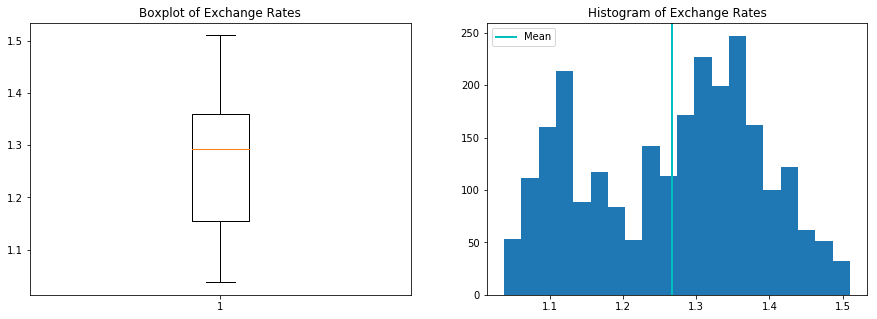

In [6]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.boxplot(USEU_data.rate.dropna(how = 'any'))
plt.title('Boxplot of Exchange Rates')

plt.subplot(1, 2, 2)
plt.hist(USEU_data.rate.dropna(how = 'any'), bins=20)
plt.axvline(USEU_data.rate.mean(), color='c', linestyle='solid', linewidth=2, label="Mean")
plt.legend(loc='upper left') 
plt.title('Histogram of Exchange Rates')

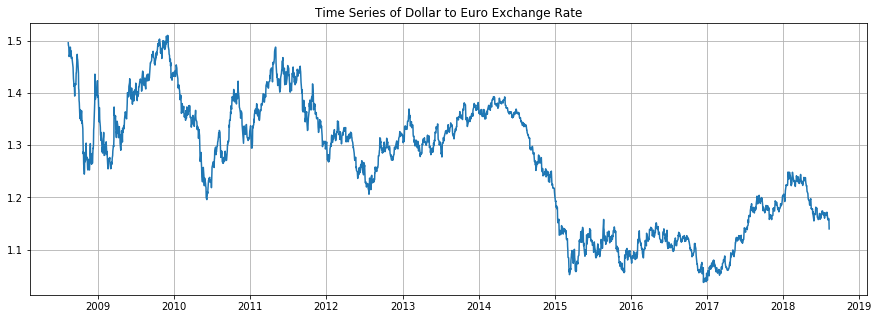

In [12]:
# convert index to datetime
USEU_data.index = pd.to_datetime(USEU_data.DATE)

plt.figure(figsize=(15, 5))
plt.plot(USEU_data.index, USEU_data.rate)
plt.grid(True)
plt.title('Time Series of Dollar to Euro Exchange Rate')
plt.show()

There is a significant drop in relative value of the Euro from late 2009 to mid 2010, then again from 2014 to early 2015.  There are inconsistent increases in the relative value of the Euro in 2009 and again from mid 2010 to mid 2011.

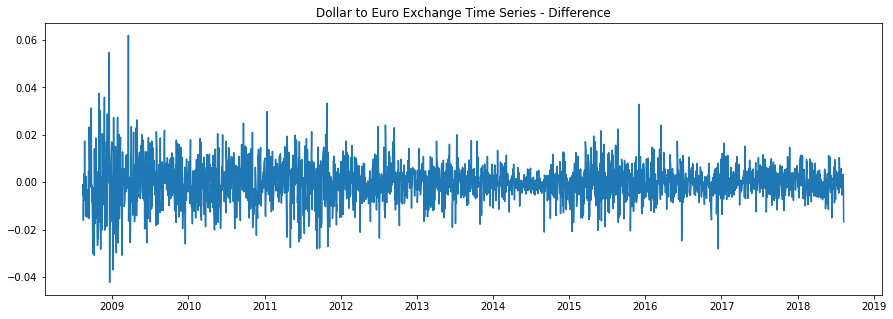

In [11]:
# difference from one record to next
USEU_data['diff_1'] = USEU_data.rate - USEU_data.rate.shift()

plt.figure(figsize=(15, 5))
plt.plot(USEU_data.index, USEU_data.diff_1)
plt.title('Dollar to Euro Exchange Time Series - Difference')
plt.show()

By plotting the difference from day to day we see greater volatility in the exchange rate in 2008 and 2009, with noticeable smaller extremes after 2009.  There is noticably more stability in the exchange rate in 2014 as less variation is seen from day to day.

# ARIMA model

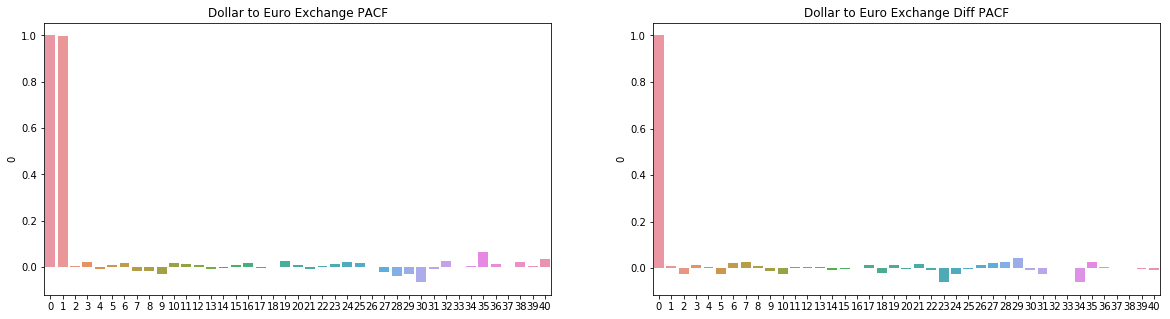

In [25]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
x_acf = pd.DataFrame(pacf(USEU_data.rate))
sns.barplot(x=x_acf.index, y=x_acf[0])
plt.title("Dollar to Euro Exchange PACF")


plt.subplot(1, 2, 2)
x_acf_diff = pd.DataFrame(pacf(USEU_data.diff_1[1:]))
sns.barplot(x=x_acf_diff.index, y=x_acf_diff[0])
plt.title("Dollar to Euro Exchange Difference PACF")
plt.show()